In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Advertising (1).csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("Sales",axis=1)

In [4]:
y= df['Sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = polynomial_converter.transform(X)

In [9]:
poly_features.shape

(212, 9)

In [10]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
test_predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test, test_predictions)

In [20]:
MSE = mean_squared_error(y_test, test_predictions)

In [21]:
RMSE = np.sqrt(MSE)

In [22]:
MAE

0.7252822359922175

In [23]:
RMSE

1.6769039941651007

In [24]:
model.coef_

array([ 5.42983345e-02,  1.64654373e-02,  2.07330979e-02, -1.16462029e-04,
        1.17805715e-03, -8.70898117e-05,  5.29363851e-05, -1.50690155e-04,
        1.27228822e-05])

In [25]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [26]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):

    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [43]:
train_rmse_error

[1.7345941243293765,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399352,
 0.2509342974485939,
 0.20957204504223886,
 5.421812534809007,
 0.19108060365249493,
 0.17607794180475378]

In [44]:
test_rmse_error

[1.5161519375993882,
 0.6646431757268956,
 0.5803286825223335,
 0.5077742646913584,
 2.5758245447505073,
 4.370883970432224,
 1378.8992107796764,
 3388.345398597823,
 95649.82714228271]

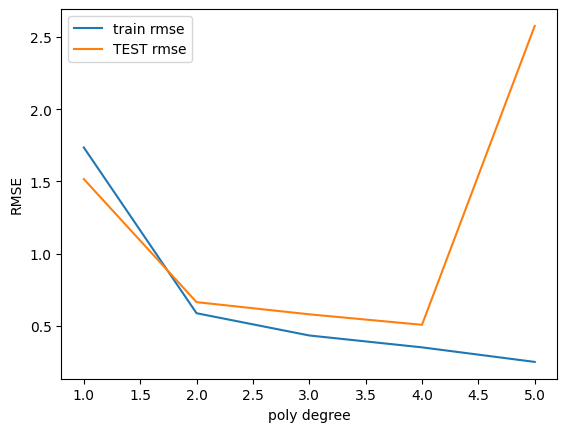

In [47]:
plt.plot(range(1,6), train_rmse_error[:5], label="train rmse")
plt.plot(range(1,6), test_rmse_error[:5], label="TEST rmse")
plt.xlabel("poly degree")
plt.ylabel("RMSE")
plt.legend()

In [27]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [28]:
final_model = LinearRegression()

In [29]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [11]:
from joblib import dump, load

In [12]:
dump(final_model, "final_polynomial_model.joblib")

['final_polynomial_model.joblib']

In [13]:
dump(final_poly_converter, "final_polynomial_converter.joblib")

['final_polynomial_converter.joblib']

In [14]:
loaded_converter = load("final_polynomial_converter.joblib")

In [15]:
loaded_model = load("final_polynomial_model.joblib")

In [16]:
compain = [[149,20,13]]

In [18]:
transform_compain = loaded_converter.fit_transform(compain)

In [19]:
loaded_model.predict(transform_compain)

array([14.22867867])